# Introduction to Regression with Neural Networks in Tensorflow

Definition: Predicting a numerical varibale based on independent variables

In [1]:
# Import tensorflow
import tensorflow as tf
import pandas as pd

## Creating data to view and fit

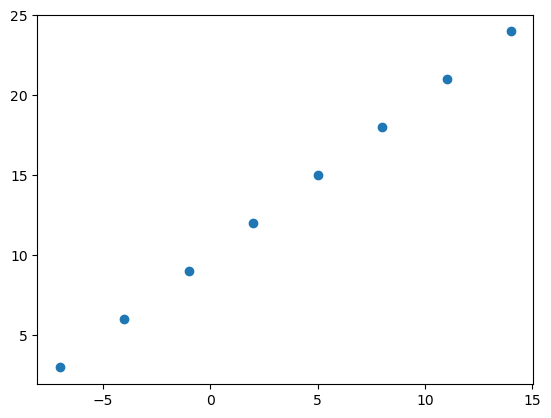

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualisation
plt.scatter(X, y)

In [3]:
#Equation expected from the above data
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [6]:
#Turn over numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype= tf.float32)
y = tf.cast(tf.constant(y), dtype= tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

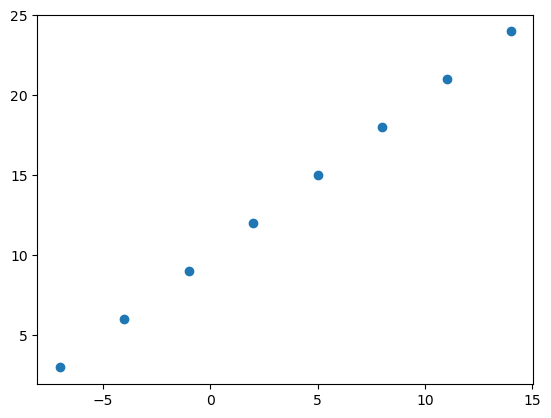

In [8]:
plt.scatter(X, y)

### Steps in modelling with Tensorflow

1. **Created a model**: define input, hidden and output layers
2. **Compile a model**: define the loss function, optimizer and the evaluation metrics
3. **Fitting a model**: train the model with the training dataset to find the pattern or relation between the independent variable and the dependent variable

In [9]:
# Set random sedd
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Alternative
""" model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1)) """

#2. Compile the model
model.compile(loss= tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fit the model
model.fit(tf.expand_dims(X, axis= -1), y, epochs= 5)

Epoch 1/5
1/1 [==============================] - 0s 120ms/step - loss: 8.3211 - mae: 8.3211
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 8.1886 - mae: 8.1886
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 8.0561 - mae: 8.0561
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 7.9236 - mae: 7.9236
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 7.7911 - mae: 7.7911


2024-01-23 15:17:27.886649: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [10]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
#Try and make a prediction using the model
ypred = model.predict([17.0])

ypred + 12.2284

1/1 [==============================] - 0s 37ms/step


array([[40.407948]], dtype=float32)

## Improving our model

We can imporve our model by altering the steps we took to create a model.

1. **Creating a model**: we might:
    1. add more **layers** 
    2. increase the **number of hidden units** within each of the hidden layers
    3. change the **activation function** of each layer.

2. **Compiling a model**: we might: 
    1. change the **optimization function** 
    2. perhaps the **learning rate** of the optimization function
3. **Fitting a model**: we might fit a model for:
    1. more **epochs** 
    2. more **data**


In [12]:
#Rebuild the model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

#3. Fit the model
model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 85ms/step - loss: 12.8233 - mae: 12.8233
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 12.6908 - mae: 12.6908
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.5583 - mae: 12.5583
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.4258 - mae: 12.4258
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 12.2933 - mae: 12.2933
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 12.1608 - mae: 12.1608
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 12.0283 - mae: 12.0283
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 11.8958 - mae: 11.8958
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7633 - mae: 11.7633
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 11.6308 - mae: 11.6308
Epoch 11/100
1/1 [==============================] - 0s 2ms

In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
#Try predicting from model

model.predict([17.0])

1/1 [==============================] - 0s 27ms/step


array([[29.729223]], dtype=float32)

In [15]:
#1. Create Sequenial model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.01))

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 106ms/step - loss: 13.5737
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5692
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 13.5647
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5602
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 13.5557
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5512
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5467
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5422
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5377
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 13.5332
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5287
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 13.5242
Epoch 13/100
1/1 [=============================

In [16]:
#Predicting
model.predict([17.0])

1/1 [==============================] - 0s 27ms/step


array([[1.442042]], dtype=float32)

In [17]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 114ms/step - loss: 13.3409 - mae: 13.3409
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 12.7705 - mae: 12.7705
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.2029 - mae: 12.2029
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.6422 - mae: 11.6422
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0722 - mae: 11.0722
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4817 - mae: 10.4817
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 9.8806 - mae: 9.8806
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 9.2658 - mae: 9.2658
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 8.6290 - mae: 8.6290
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.9795 - mae: 7.9795
Epoch 11/100
1/1 [==============================] - 0s 2ms/step -

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 28ms/step


array([[32.787914]], dtype=float32)

**Note**: In the above case, although the loss value is less but the prediction is way farther than the previous one which was much nearer to the actual value. Hence, this is a clear case of overfitting

In [19]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 110ms/step - loss: 13.5267 - mae: 13.5267
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 12.9733 - mae: 12.9733
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.4335 - mae: 12.4335
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.9004 - mae: 11.9004
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.3603 - mae: 11.3603
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8590 - mae: 10.8590
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3336 - mae: 10.3336
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 9.7862 - mae: 9.7862
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 9.2206 - mae: 9.2206
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 8.6310 - mae: 8.6310
Epoch 11/100
1/1 [==============================] - 0s 2ms/step

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 29ms/step


array([[31.389605]], dtype=float32)

In [21]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 117ms/step - loss: 12.6838 - mae: 12.6838
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 12.1713 - mae: 12.1713
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 11.6532 - mae: 11.6532
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.1267 - mae: 11.1267
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5892 - mae: 10.5892
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0379 - mae: 10.0379
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 9.4699 - mae: 9.4699
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 8.8824 - mae: 8.8824
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 8.2723 - mae: 8.2723
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.6365 - mae: 7.6365
Epoch 11/100
1/1 [==============================] - 0s 2ms/step -

In [22]:
model.predict([17.0])

1/1 [==============================] - 0s 30ms/step


array([[28.014343]], dtype=float32)

In [23]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 210ms/step - loss: 11.8780 - mae: 11.8780
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.8111 - mae: 11.8111
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 11.7443 - mae: 11.7443
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.6774 - mae: 11.6774
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.6105 - mae: 11.6105
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 11.5435 - mae: 11.5435
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 11.4765 - mae: 11.4765
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 11.4095 - mae: 11.4095
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 11.3424 - mae: 11.3424
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2752 - mae: 11.2752
Epoch 11/100
1/1 [==============================] - 0s 2m

In [24]:
model.predict([17.0])

1/1 [==============================] - 0s 32ms/step


array([[31.270674]], dtype=float32)

In [25]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.01),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 162ms/step - loss: 14.2814 - mae: 14.2814
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 14.2107 - mae: 14.2107
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 14.1401 - mae: 14.1401
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 14.0695 - mae: 14.0695
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 13.9990 - mae: 13.9990
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 13.9286 - mae: 13.9286
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 13.8582 - mae: 13.8582
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 13.7878 - mae: 13.7878
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 13.7175 - mae: 13.7175
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 13.6473 - mae: 13.6473
Epoch 11/100
1/1 [==============================] - 0s 2m

In [26]:
model.predict([17.0])

1/1 [==============================] - 0s 28ms/step


array([[28.811195]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> and repeat
```

3 thigs to remember when we evaluate:
> "Visualise, Visualise and Visualise"

Things to visualise:
1. The data
2. The model itself
3. The training of a model
4. The prediction of the model

In [27]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [28]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

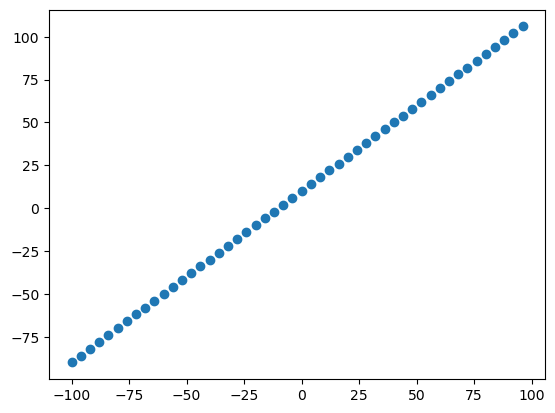

In [29]:
#Visualise the data
plt.scatter(X, y)

### Three sets of the data for the model

1. Training dataset
2. Validating dataset
3. Testing dataset

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size= 0.20)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40,), (10,), (40,), (10,))

In [31]:
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([ -76,  -36,    4,   40,  -44,   68,   84,  -80,  -40,   28,  -32,
           8,   -4, -100,  -84,  -60,   76,   88,   64,   20,  -12,   60,
           0,   56,   92,  -96,  -20,   24,  -24,   16,  -28,  -88,   80,
         -48,   72,   52,   12,   48,   36,   44], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ -8, -72, -68,  32,  96, -52, -56, -64, -16, -92], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-66, -26,  14,  50, -34,  78,  94, -70, -30,  38, -22,  18,   6,
        -90, -74, -50,  86,  98,  74,  30,  -2,  70,  10,  66, 102, -86,
        -10,  34, -14,  26, -18, -78,  90, -38,  82,  62,  22,  58,  46,
         54], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([  2, -62, -58,  42, 106, -42, -46, -54,  -6, -82], dtype=int32)>)

### Visualising the data

Now we have got out data in training and test sets ... Let's Visualise it

[]

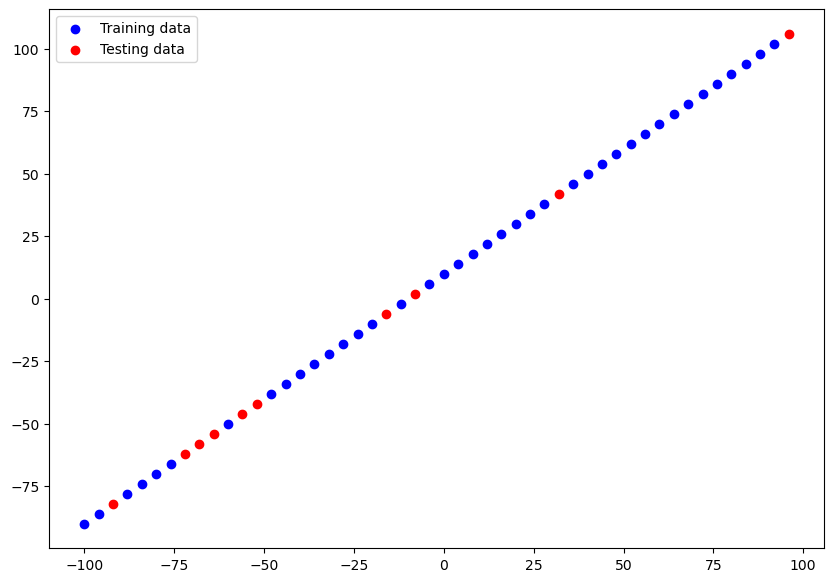

In [32]:
plt.figure(figsize= (10, 7))

plt.scatter(X_train, y_train, c= 'blue', label= 'Training data')
plt.scatter(X_test, y_test, c= 'red', label= 'Testing data')

plt.legend()

plt.plot()

In [33]:
# Let's build a model using the training and evaluate using the testing data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD())

# model.fit(X_train, y_train, epochs= 100)

In [34]:
#Visualising the model

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [35]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= 'relu', input_shape= [1]),
    tf.keras.layers.Dense(50, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1, name= "output_layer")
], name= 'Model_1')

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
              metrics= ['mae'])


In [36]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 50)                550       
                                                                 
 dense_16 (Dense)            (None, 100)               5100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 5,771
Trainable params: 5,771
Non-trainable params: 0
_________________________________________________________________


1. Total Params: total number of parameters in the model
2. Trainable parameters: parameters that can be updated while on training
3. Non-trainable params: parameters that are not updated while training, particularly seen in **transfer learning models**

**Excercies**: Try playing around with the number of hidden units in the dense layer, see how that effect the number of parameters

In [37]:
#Let's fit the model to the training data
model.fit(X_train, y_train, epochs= 150, verbose= 1)

Epoch 1/150


2/2 [==============================] - 0s 8ms/step - loss: 52.1360 - mae: 52.1360
Epoch 2/150
2/2 [==============================] - 0s 2ms/step - loss: 49.5029 - mae: 49.5029
Epoch 3/150
2/2 [==============================] - 0s 3ms/step - loss: 47.1665 - mae: 47.1665
Epoch 4/150
2/2 [==============================] - 0s 2ms/step - loss: 44.7419 - mae: 44.7419
Epoch 5/150
2/2 [==============================] - 0s 1ms/step - loss: 42.2877 - mae: 42.2877
Epoch 6/150
2/2 [==============================] - 0s 1ms/step - loss: 40.1346 - mae: 40.1346
Epoch 7/150
2/2 [==============================] - 0s 1ms/step - loss: 37.9548 - mae: 37.9548
Epoch 8/150
2/2 [==============================] - 0s 1ms/step - loss: 35.7507 - mae: 35.7507
Epoch 9/150
2/2 [==============================] - 0s 1ms/step - loss: 33.3258 - mae: 33.3258
Epoch 10/150
2/2 [==============================] - 0s 1ms/step - loss: 30.9087 - mae: 30.9087
Epoch 11/150
2/2 [==============================] - 0s 1ms/step - loss:

In [38]:
# Get a summary of our model
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                20        
                                                                 
 dense_15 (Dense)            (None, 50)                550       
                                                                 
 dense_16 (Dense)            (None, 100)               5100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 5,771
Trainable params: 5,771
Non-trainable params: 0
_________________________________________________________________


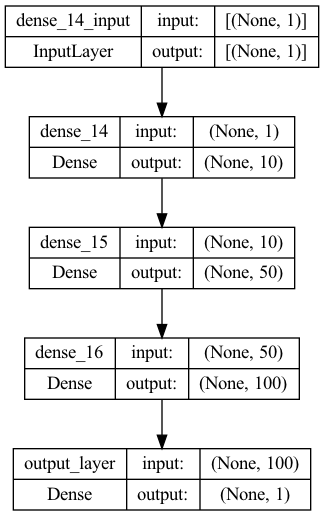

In [39]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes= True)

### Visualising our model ppredictions

To visualise prediction, it's a good idea to plot them against the ground truth labels.

Often you will see this in the form of `y_test` or `y_true` versus `y_pred`

In [40]:
#Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 28ms/step


array([[ -0.73648965],
       [-62.10014   ],
       [-58.27383   ],
       [ 40.031063  ],
       [110.37877   ],
       [-42.96859   ],
       [-46.7949    ],
       [-54.44752   ],
       [ -8.461618  ],
       [-81.2317    ]], dtype=float32)

In [41]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([  2, -62, -58,  42, 106, -42, -46, -54,  -6, -82], dtype=int32)>

**Note**: If you feel like you are going to reuse some kind of functionality in the future, it is a good idea to turn it into a function

In [42]:
# Let's create a plotting function
def plot_predictions(train_data= X_train, train_labels= y_train,
                     test_data= X_test, test_labels= y_test,
                     predictions= y_pred):
    """
    Plots training data, test data and compares prediction to ground truth labels
    """

    plt.figure(figsize=(10, 7))
    #Plot training data in blue
    plt.scatter(train_data, train_labels, c= 'b', label= "Training data")
    #PLotting testing data in green
    plt.scatter(test_data, test_labels, c= 'g', label= "Testing data")
    #plotting prediction data in red
    plt.scatter(test_data, predictions, c= 'r', label= 'Prediction data')
    plt.legend()
    plt.show()

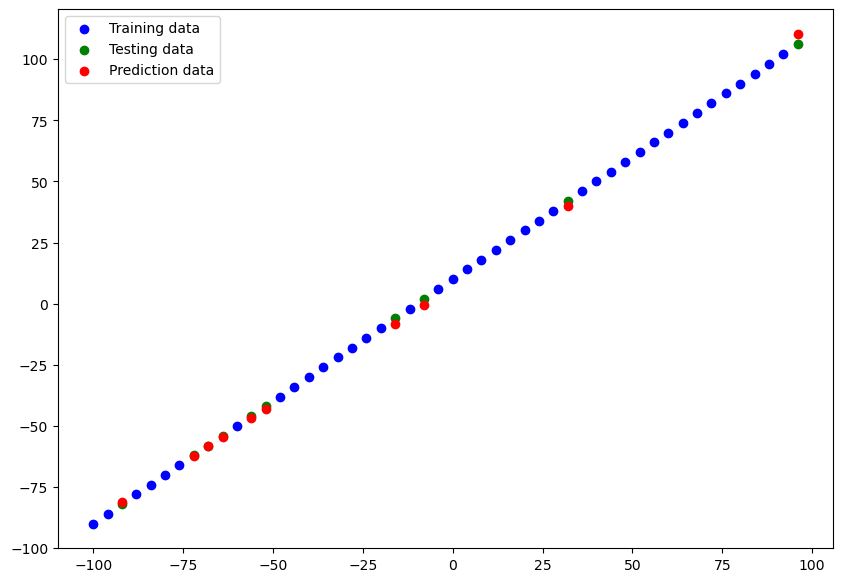

In [43]:
plot_predictions(train_data= X_train, train_labels= y_train,
                 test_data= X_test, test_labels= y_test,
                 predictions= y_pred)

### Evaluating our models predictions with regression evaluation metrics

Depending on the problem you are working on there will be different evaluation metric to evaluate your model's performance.

Since we are working on a regressionm, two of the main metrics:
1. MAE - Mean absolute error
2. MSE - Means square error

In [44]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 83ms/step - loss: 1.4899 - mae: 1.4899


[1.489912509918213, 1.489912509918213]

In [45]:
# Calculate the mae
loss_value = tf.keras.metrics.mean_absolute_error(y_test, 
                                                  tf.squeeze(tf.constant(y_pred)))
loss_value.numpy()

1.4899098

In [46]:
#Calculate the mse
mse_value = tf.keras.losses.MSE(y_test, tf.squeeze(tf.constant(y_pred)))

mse_value

<tf.Tensor: shape=(), dtype=float32, numpy=3.9043877>

In [47]:
#make some function to reuse mae and mse
def mae(y_true, y_pred):
    return tf.keras.losses.MAE(y_true, tf.squeeze(tf.constant(y_pred)))

def mse(y_true, y_pred):
    return tf.keras.losses.MSE(y_true, tf.squeeze(tf.constant(y_pred)))

### Running experiments to improve our model
```
Build -> fit -> evaluate -> tweak -> repeat
```

1. Get more data
2. Make your model larger
3. Train for longer

Let's perform 3 modelling experiments
1. `model_1`: same as the original, 1 layer, trained for 100 epochs
2. `model_2`: 2 layers, trained for 100 epochs
3. `model_3`: 2 layers, trained for 500 epochs
4. `model_4`: on your own
5. `model_5`

**Build `model_1`**

In [48]:
#set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name= 'model_1')

model_1.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['mae'])

model_1.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs= 100)


Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 29.9598 - mae: 29.9598
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 11.1390 - mae: 11.1390
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 13.6294 - mae: 13.6294
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 10.6153 - mae: 10.6153
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 10.6474 - mae: 10.6474
Epoch 6/100
2/2 [==============================] - 0s 989us/step - loss: 9.9098 - mae: 9.9098
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 11.6365 - mae: 11.6365
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 9.6382 - mae: 9.6382
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 10.1018 - mae: 10.1018
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 9.5391 - mae: 9.5391
Epoch 11/100
2/2 [==============================] - 0s 1ms/step

2/2 [==============================] - 0s 1ms/step - loss: 9.3948 - mae: 9.3948
Epoch 23/100
2/2 [==============================] - 0s 933us/step - loss: 10.8300 - mae: 10.8300
Epoch 24/100
2/2 [==============================] - 0s 1ms/step - loss: 9.6841 - mae: 9.6841
Epoch 25/100
2/2 [==============================] - 0s 1ms/step - loss: 10.1060 - mae: 10.1060
Epoch 26/100
2/2 [==============================] - 0s 1ms/step - loss: 18.1955 - mae: 18.1955
Epoch 27/100
2/2 [==============================] - 0s 1ms/step - loss: 8.8802 - mae: 8.8802
Epoch 28/100
2/2 [==============================] - 0s 1ms/step - loss: 10.9870 - mae: 10.9870
Epoch 29/100
2/2 [==============================] - 0s 1ms/step - loss: 11.6559 - mae: 11.6559
Epoch 30/100
2/2 [==============================] - 0s 1ms/step - loss: 18.1990 - mae: 18.1990
Epoch 31/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2609 - mae: 11.2609
Epoch 32/100
2/2 [==============================] - 0s 2ms/step - l

In [49]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


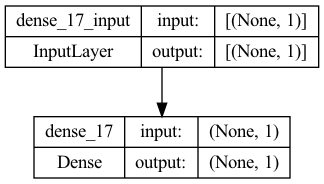

In [50]:
plot_model(model_1, show_shapes= True)

1/1 [==============================] - 0s 20ms/step


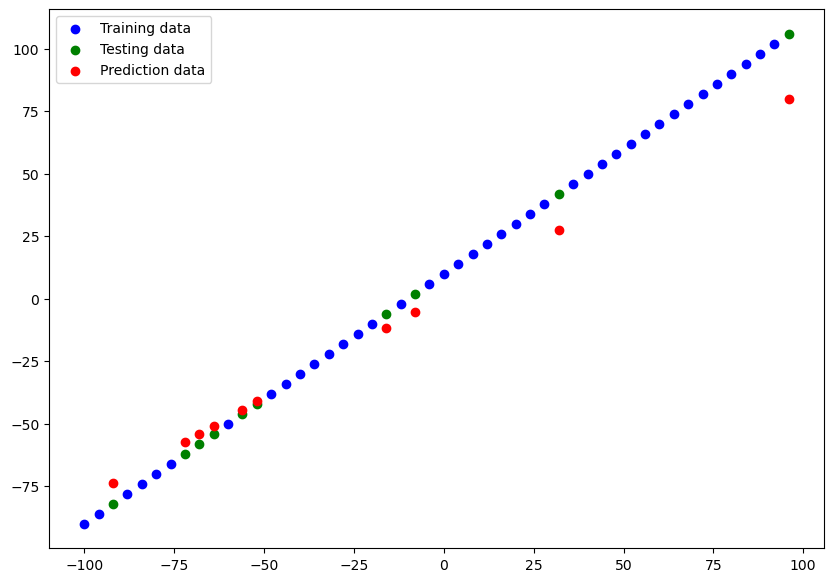

In [51]:
# make and plot prediction for model_1
y_pred_1 = model_1.predict(tf.expand_dims(X_test, axis= -1))
plot_predictions(train_data= X_train, train_labels= y_train,
                 test_data= X_test, test_labels= y_test,
                 predictions= y_pred_1)

In [52]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=7.59507>,
 <tf.Tensor: shape=(), dtype=float32, numpy=109.682335>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [53]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['mse'])

model_2.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs= 100)

Epoch 1/100


2/2 [==============================] - 0s 3ms/step - loss: 92.6854 - mse: 12399.9902
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 27.8093 - mse: 1116.3777
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 17.9841 - mse: 524.8667
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 22.7807 - mse: 735.2169
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 23.2002 - mse: 782.7660
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 19.7762 - mse: 531.6999
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 26.0718 - mse: 1002.2894
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 11.3580 - mse: 156.9451
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 17.6280 - mse: 457.0037
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 33.0450 - mse: 1560.5448
Epoch 11/100
2/2 [==============================] - 0s 1

1/1 [==============================] - 0s 22ms/step


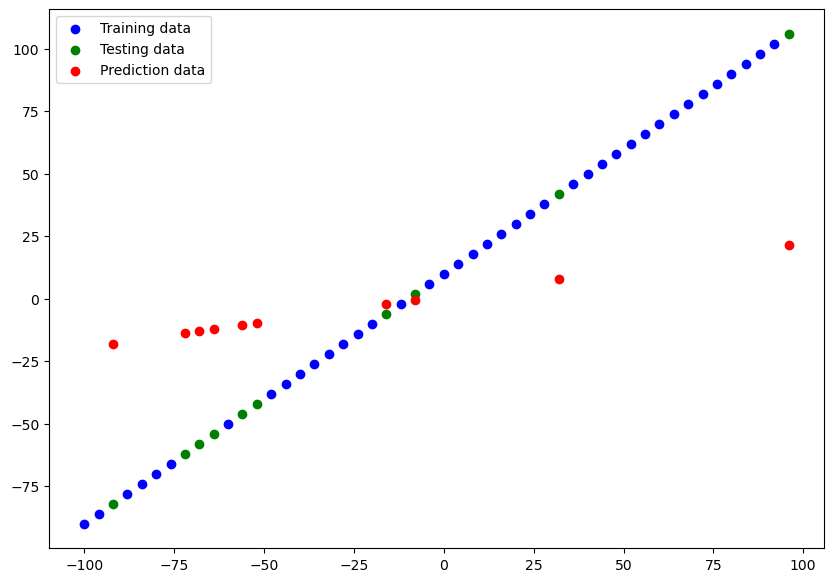

In [54]:
y_pred_2 = model_2.predict(X_test)

plot_predictions(predictions= y_pred_2)

In [55]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=39.18596>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2083.5688>)

**Build `model_3`**

* 2 layers, 500 epochs

In [56]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['mae'])

model_3.fit(tf.expand_dims(X_train, axis= -1), y_train, epochs= 500)

Epoch 1/500


2/2 [==============================] - 0s 3ms/step - loss: 62.7140 - mae: 62.7140
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 44.9449 - mae: 44.9449
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 46.0421 - mae: 46.0421
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 20.9434 - mae: 20.9434
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 24.7237 - mae: 24.7237
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 11.1445 - mae: 11.1445
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 29.1388 - mae: 29.1388
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 26.7336 - mae: 26.7336
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 9.7775 - mae: 9.7775
Epoch 10/500
2/2 [==============================] - 0s 1ms/step - loss: 16.5939 - mae: 16.5939
Epoch 11/500
2/2 [==============================] - 0s 2ms/step - loss: 1

1/1 [==============================] - 0s 24ms/step


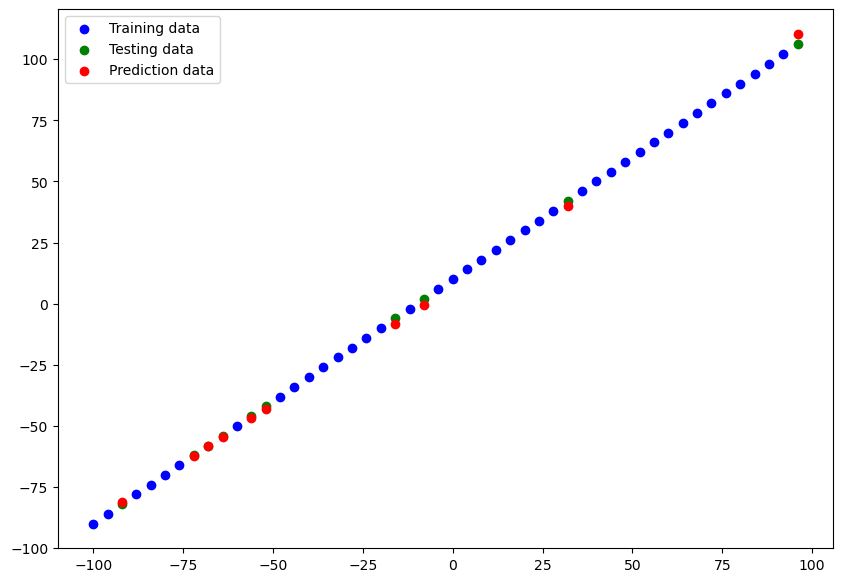

In [57]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions= y_pred)

In [58]:
mae_3 = mae(y_test, y_pred)
mse_3 = mse(y_test, y_pred)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.4899098>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.9043877>)

**Note**: You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary

### Comparing the results of our experiments

We have run a few experiments, let's compare the results

In [59]:
# Let's compare the model's result using pandas
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns= ["model", "mae", "mse"])

all_results

,model,mae,mse
0,model_1,7.595070,109.682335
1,model_2,39.185959,2083.568848
2,model_3,1.489910,3.904388


Looks like `model_3` performed the best

In [60]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note**: One of the main goal should be to minimize the time between your experiments. The more expermients you do, the more things you'll figure what wiil not work and reach more and more closer to the optimal model

## Tracking your experiments

One really good habit is to track your experiments.

And when doing so, it can be tedious if you are running lots of experiments.

Luckily, there are tools to help us:
**Resource**:

* Tensorboard
* Weights and Biases


### Saving Model

Saving our models allows us to use them outside of the editor we have code the model such as in a web application or a mobile app.

There are two major formats we can save our model's:
1. SavedModel Format
2. HDF5 format

In [61]:
model_3.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [62]:
model_3.save("best_model_HDF5_format.h5")

## Loading a saved model

In [63]:
SavedModel_format_model = tf.keras.models.load_model("best_model_SavedModel_format")
HDF5_format_model = tf.keras.models.load_model("best_model_HDF5_format.h5")

In [64]:
#Comparing the model architecture
SavedModel_format_model.summary(), HDF5_format_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params:

(None, None)

In [65]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compare model_2 predictions with SavedModel and HDF5 format predictions
model_3_predictions = model_3.predict(X_test)
SavedModel_predictions = SavedModel_format_model.predict(X_test)
HDF5_predictions = HDF5_format_model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


In [67]:
model_3_predictions == SavedModel_predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [68]:
model_3_predictions == HDF5_predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [69]:
#Comparinmg model MAE values
mae(y_test, model_3_predictions) == mae(y_test, SavedModel_predictions), mae(y_test, model_3_predictions) == mae(y_test, HDF5_predictions)

(<tf.Tensor: shape=(), dtype=bool, numpy=True>,
 <tf.Tensor: shape=(), dtype=bool, numpy=True>)

### A Larger Example

In [70]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
insurances = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurances

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [72]:
#Let's one hot encode our dataframe
insurance_one_hot = pd.get_dummies(insurances, dtype= int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


**Things to do**:
1. `Create X and Y values`
2. `Training and test set`
3. `Build a neural network`

In [73]:
#1. Creating feature names for X and y values
feature_names = [e for e in insurance_one_hot.columns if e != "charges"]
feature_names

['age',
 'bmi',
 'children',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [74]:
#Creating X and y values
X_insurance = insurance_one_hot[feature_names]
y_insurance = insurance_one_hot['charges']

In [75]:
#Verifying the shapes
X_insurance.shape, y_insurance.shape

((1338, 11), (1338,))

In [76]:
#2. Splitting X and y into training and testing splits
X_train_insurance, X_test_insurance, y_train_insurance, y_test_insurance = train_test_split(X_insurance, y_insurance, test_size= 0.2, random_state= 42)
X_train_insurance.shape, X_test_insurance.shape, y_train_insurance.shape, y_test_insurance.shape

((1070, 11), (268, 11), (1070,), (268,))

In [77]:
#3. Building a neural network
tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(loss= tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model_1.fit(X_train_insurance, y_train_insurance, epochs= 500)

Epoch 1/500
34/34 [==============================] - 0s 467us/step - loss: 8661.0488 - mae: 8661.0488
Epoch 2/500
34/34 [==============================] - 0s 377us/step - loss: 7885.8423 - mae: 7885.8423
Epoch 3/500
34/34 [==============================] - 0s 365us/step - loss: 7545.0601 - mae: 7545.0601
Epoch 4/500
34/34 [==============================] - 0s 311us/step - loss: 7632.9727 - mae: 7632.9727
Epoch 5/500
34/34 [==============================] - 0s 325us/step - loss: 7729.3672 - mae: 7729.3672
Epoch 6/500
34/34 [==============================] - 0s 320us/step - loss: 7666.4468 - mae: 7666.4468
Epoch 7/500
34/34 [==============================] - 0s 319us/step - loss: 7534.2349 - mae: 7534.2349
Epoch 8/500
34/34 [==============================] - 0s 310us/step - loss: 7788.7900 - mae: 7788.7900
Epoch 9/500
34/34 [==============================] - 0s 309us/step - loss: 7584.5215 - mae: 7584.5215
Epoch 10/500
34/34 [==============================] - 0s 328us/step - loss: 7685.1

In [78]:
# check the results of the insurance model on the test data
insurance_model_1.evaluate(X_test_insurance, y_test_insurance)

9/9 [==============================] - 0s 516us/step - loss: 4614.6802 - mae: 4614.6802


[4614.68017578125, 4614.68017578125]

In [79]:
y_train_insurance.mean(), y_train_insurance.median()

(13346.089736364485, 9575.4421)

Right now the model is not performing well. Let's imporve it

Experiments:
1. Add an extra layer
2. Train for longer
3. Your own experiments

In [80]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss= tf.keras.losses.mae, 
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics= ['mae'])

insurance_model_2.fit(X_train_insurance, y_train_insurance, epochs= 500, verbose= 1)

Epoch 1/500


34/34 [==============================] - 0s 530us/step - loss: 13294.5547 - mae: 13294.5547
Epoch 2/500
34/34 [==============================] - 0s 448us/step - loss: 13142.9756 - mae: 13142.9756
Epoch 3/500
34/34 [==============================] - 0s 373us/step - loss: 12813.6318 - mae: 12813.6318
Epoch 4/500
34/34 [==============================] - 0s 331us/step - loss: 12158.2109 - mae: 12158.2109
Epoch 5/500
34/34 [==============================] - 0s 334us/step - loss: 11047.9004 - mae: 11047.9004
Epoch 6/500
34/34 [==============================] - 0s 331us/step - loss: 9596.0967 - mae: 9596.0967
Epoch 7/500
34/34 [==============================] - 0s 348us/step - loss: 8238.0029 - mae: 8238.0029
Epoch 8/500
34/34 [==============================] - 0s 332us/step - loss: 7541.4888 - mae: 7541.4888
Epoch 9/500
34/34 [==============================] - 0s 326us/step - loss: 7418.7012 - mae: 7418.7012
Epoch 10/500
34/34 [==============================] - 0s 325us/step - loss: 7397.638

In [81]:
#Evaluate the model
insurance_model_2.evaluate(X_test_insurance, y_test_insurance)

9/9 [==============================] - 0s 553us/step - loss: 3171.3796 - mae: 3171.3796


[3171.379638671875, 3171.379638671875]

In [82]:
insurance_model_1.evaluate(X_test_insurance, y_test_insurance)

9/9 [==============================] - 0s 492us/step - loss: 4614.6802 - mae: 4614.6802


[4614.68017578125, 4614.68017578125]

In [83]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss= tf.keras.losses.mae,
                          optimizer= tf.keras.optimizers.Adam(),
                          metrics= ['mae'])

history = insurance_model_3.fit(X_train_insurance, y_train_insurance, epochs= 1000)

Epoch 1/1000
34/34 [==============================] - 0s 585us/step - loss: 13303.7969 - mae: 13303.7969
Epoch 2/1000
34/34 [==============================] - 0s 509us/step - loss: 13134.4121 - mae: 13134.4121
Epoch 3/1000
34/34 [==============================] - 0s 445us/step - loss: 12786.1309 - mae: 12786.1309
Epoch 4/1000
34/34 [==============================] - 0s 380us/step - loss: 12095.1338 - mae: 12095.1338
Epoch 5/1000
34/34 [==============================] - 0s 374us/step - loss: 10933.7764 - mae: 10933.7764
Epoch 6/1000
34/34 [==============================] - 0s 380us/step - loss: 9459.7275 - mae: 9459.7275
Epoch 7/1000
34/34 [==============================] - 0s 752us/step - loss: 8139.1206 - mae: 8139.1206
Epoch 8/1000
34/34 [==============================] - 0s 396us/step - loss: 7533.0254 - mae: 7533.0254
Epoch 9/1000
34/34 [==============================] - 0s 407us/step - loss: 7440.1299 - mae: 7440.1299
Epoch 10/1000
34/34 [==============================] - 0s 390us

In [84]:
#Evaluate the model
insurance_model_3.evaluate(X_test_insurance, y_test_insurance) 

9/9 [==============================] - 0s 533us/step - loss: 3212.2922 - mae: 3212.2922


[3212.292236328125, 3212.292236328125]

In [85]:
insurance_model_1.evaluate(X_test_insurance, y_test_insurance)

9/9 [==============================] - 0s 469us/step - loss: 4614.6802 - mae: 4614.6802


[4614.68017578125, 4614.68017578125]

Text(0.5, 0, 'Epochs')

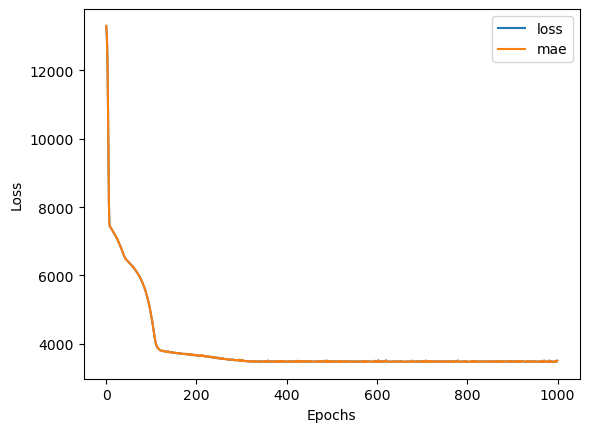

In [86]:
#PLot history (training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

**Question**: How long should you train for?

It depends upon the problem we are trying to resolve. Howevcer, tensorflow has provided with a solution called [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping).

It is a tensorflow component which can be added to our model to stop training once it stops improving at certain metric

### Prepocessing data (Normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better

In [87]:
X_insurance

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

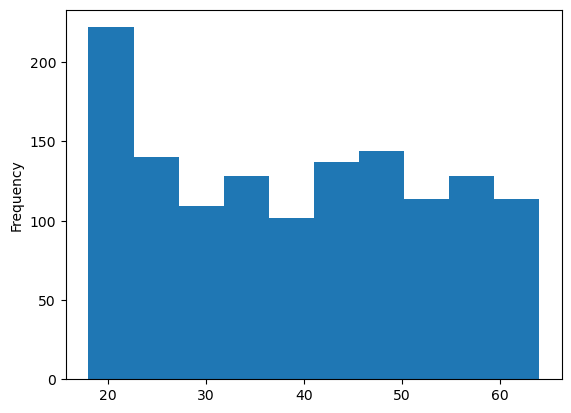

In [88]:
X_insurance["age"].plot(kind= "hist")

<Axes: ylabel='Frequency'>

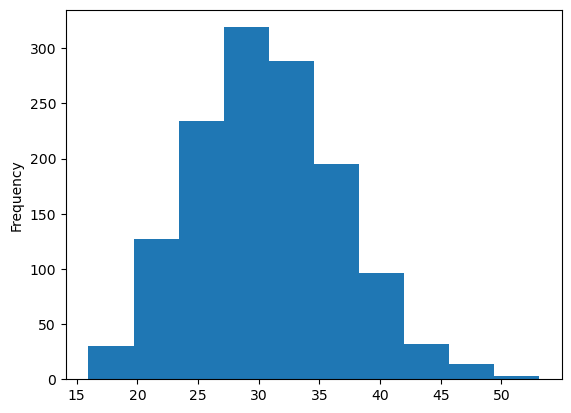

In [89]:
X_insurance["bmi"].plot(kind= "hist")

In [90]:
X_insurance["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

To prepare our data, we can borrow a few classes from Scikit-learn

In [92]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a coilumn transformer
ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]), #turns all the numerical columns
                             (OneHotEncoder(handle_unknown= "ignore"), ["sex", "smoker", "region"])
                             )

X_insurance_1 = insurances.drop("charges", axis= 1)
y_insurance_1 = insurances["charges"]

#Build our train and test set
X_train_insurance_1, X_test_insurance_1, y_train_insurance_1, y_test_insurance_1 = train_test_split(X_insurance_1, y_insurance_1, test_size= 0.2, random_state= 42)

ct.fit(X_train_insurance_1)

#Transform training and test data with normalization
X_train_normal = ct.transform(X_train_insurance_1)
X_test_normal = ct.transform(X_test_insurance_1)

In [96]:
X_train_insurance_1.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [95]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [97]:
X_train_insurance_1.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalizzed and one hot encoded.
Now Let's build a neural network model on it and see hor it goes

In [100]:
#Build a neural network model to fit on our normalized data

tf.random.set_seed(42)

insurance_normal_model_1 =  tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_normal_model_1.compile(loss= tf.keras.losses.mae,
                                 optimizer=tf.keras.optimizers.Adam(),
                                 metrics= ['mae'])

insurance_normal_model_1.fit(X_train_normal, y_train_insurance_1, epochs= 500)

Epoch 1/500
34/34 [==============================] - 0s 624us/step - loss: 13344.8223 - mae: 13344.8223
Epoch 2/500
34/34 [==============================] - 0s 528us/step - loss: 13339.5215 - mae: 13339.5215
Epoch 3/500
34/34 [==============================] - 0s 465us/step - loss: 13325.5303 - mae: 13325.5303
Epoch 4/500
34/34 [==============================] - 0s 514us/step - loss: 13293.2334 - mae: 13293.2334
Epoch 5/500
34/34 [==============================] - 0s 454us/step - loss: 13231.2354 - mae: 13231.2354
Epoch 6/500
34/34 [==============================] - 0s 377us/step - loss: 13127.8916 - mae: 13127.8916
Epoch 7/500
34/34 [==============================] - 0s 365us/step - loss: 12972.3447 - mae: 12972.3447
Epoch 8/500
34/34 [==============================] - 0s 361us/step - loss: 12754.0479 - mae: 12754.0479
Epoch 9/500
34/34 [==============================] - 0s 365us/step - loss: 12462.4756 - mae: 12462.4756
Epoch 10/500
34/34 [==============================] - 0s 373us/s

In [101]:
insurance_normal_model_1.evaluate(X_test_normal, y_test_insurance_1)

9/9 [==============================] - 0s 553us/step - loss: 3161.1545 - mae: 3161.1545


[3161.154541015625, 3161.154541015625]

In [98]:
insurance_model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               1200      
                                                                 
 dense_25 (Dense)            (None, 10)                1010      
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
